# Liouville theorem and conservation laws


The notebook illustrates thermalization in two sets of 1D equations, 

that can be seen as 1D "poor-man" fluid equations

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
figheight=10

## Example 1 : Orszag's model
N-dimensional system of ODE prescribed by the (real) dynamics 

$$ \dot z_i = F_i({\bf z}) := z_{i+1}z_{i+2}+z_{i-1}z_{i-2}-2z_{i+1}z_{i-1} \;\; \text{for }\;\; i=0...{N-1}$$

with periodic boundary conditions : $z_{i+N} = z_i$ 

and initial conditions ${\bf z}(t=0) \in \mathbb R^N$

In [2]:
def orszag(y,t):
    ydot=np.zeros_like(y)
    N=len(y)
    ix=np.arange(N)
    ydot[ix]=y[(ix+1)%N]*y[(ix+2)%N]\
            +y[(ix-1)%N]*y[(ix-2)%N]\
            -2*y[(ix+1)%N]*y[(ix-1)%N]
    return ydot

### Single Realization

In [3]:
N=5
TMAX=50
NT=1000*TMAX
Nech=20 #Takes 20 seconds approximately

#Integration
time=np.linspace(0,TMAX,NT)

#Non-Gibbsian Initial condition 
beta_ng=np.ones(N); beta_ng[0]=1e10; beta_ng[1:]=(N-1)/2

#Gibbsian Initial condition 
beta_g=np.ones(N)*N/2;

Etot=1 #Total average energy
Edof=Etot/N #Energy per dof

S2_g,S2_ng=np.zeros((NT,N)),np.zeros((NT,N))

for i in range(Nech):
    y0= np.sqrt(0.5/beta_ng)*np.random.randn(N)
    y=scp.integrate.odeint(orszag,y0,time)
    S2_ng=S2_ng+y**2/Nech

    y0= np.sqrt(0.5/beta_g)*np.random.randn(N)
    y=scp.integrate.odeint(orszag,y0,time)
    S2_g=S2_g+y**2/Nech

def plot_realization():
    fig,ax=subplots(1,3,figsize=(figheight*3,figheight),num="Realization Orszag")
    a=ax[0]
    a.plot(time,y)
    a.set_xlabel('time')
    a.set_ylabel('$z_i$')

    a=ax[1]
    a.plot(y[:,0],y[:,1])
    a.set_xlabel('$z_0$')
    a.set_ylabel('$z_1$')

    a=ax[2]
    a.plot(time,(y**2).sum(axis=1)/Etot)

    a.set_xlabel('Time')
    a.set_ylabel('Energy')
    a.set_ylim(0,2)

    return fig,ax

<IPython.core.display.Javascript object>


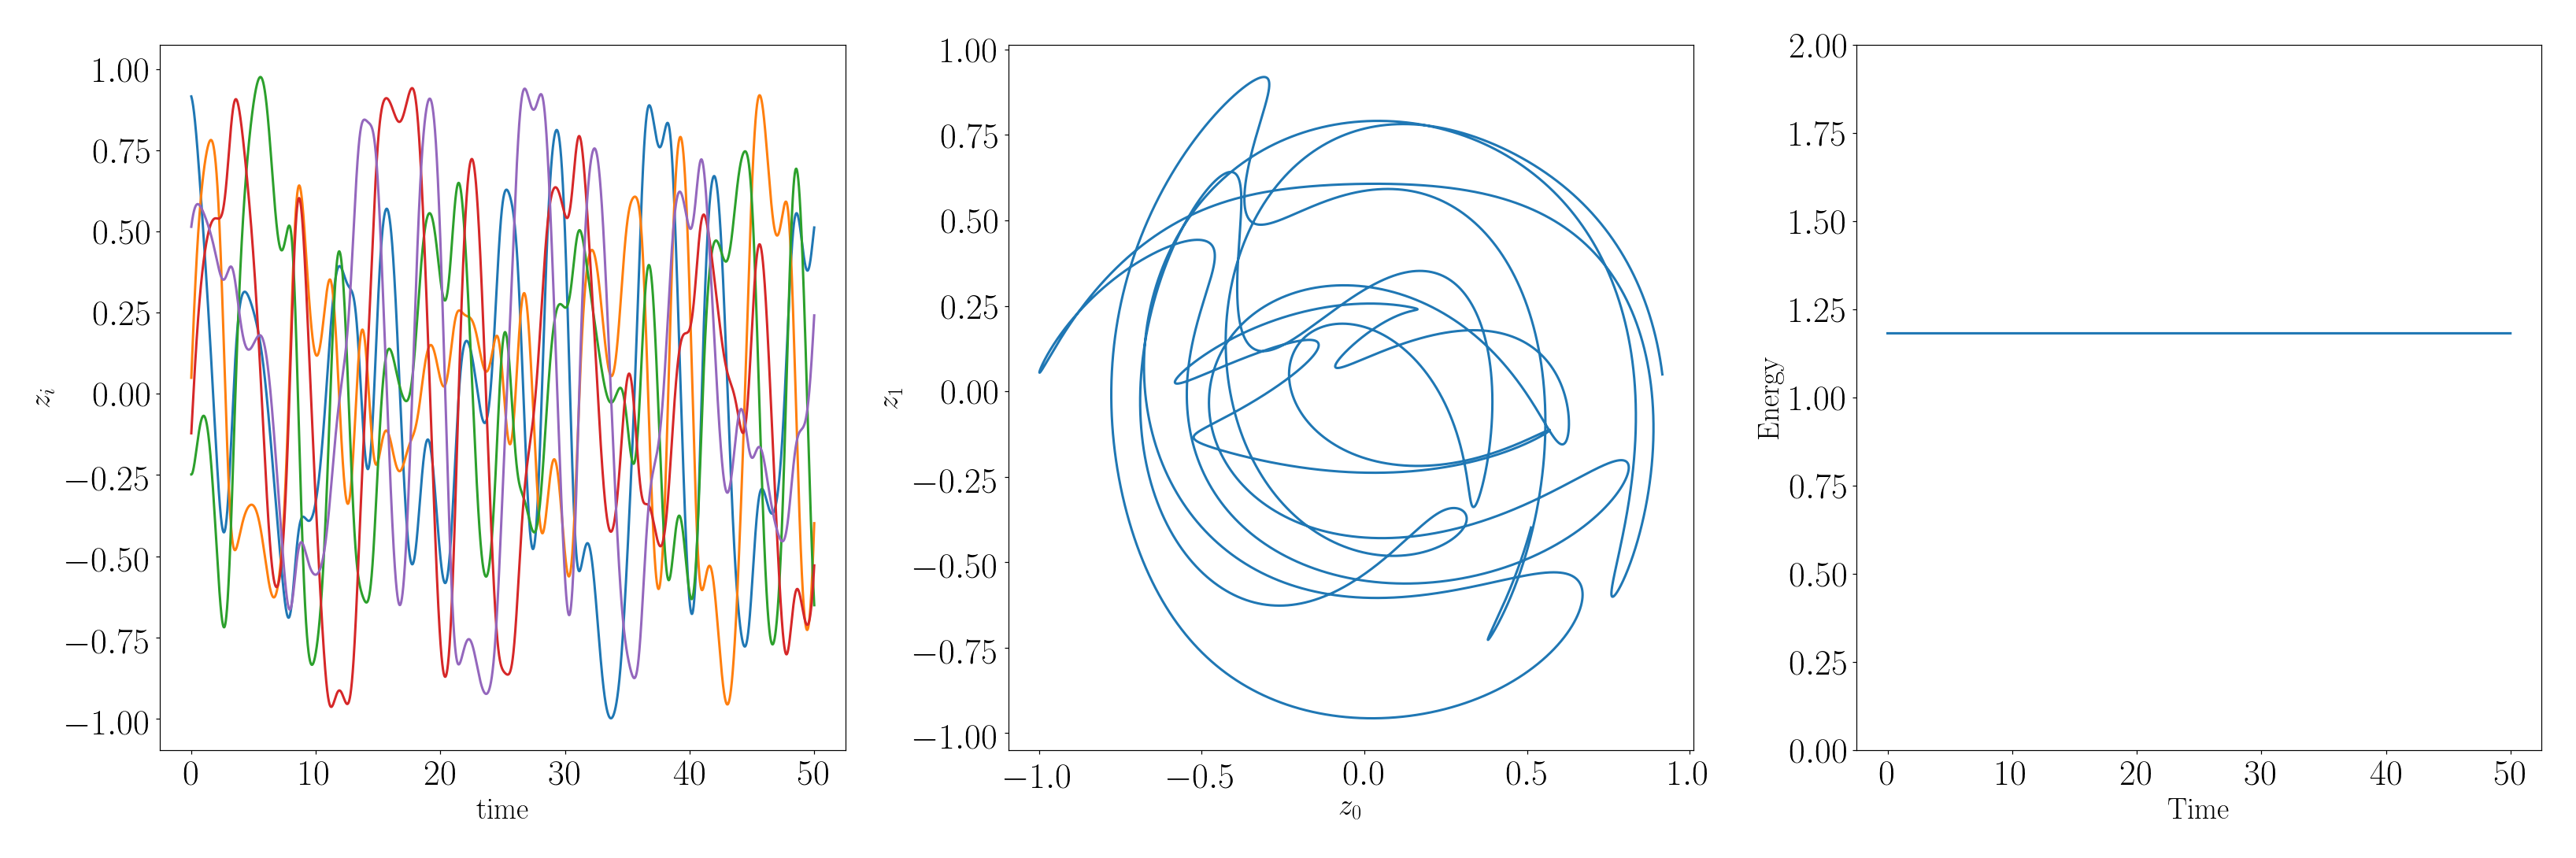

In [4]:
fig,ax=plot_realization()

### Ensembles

In [5]:
def plot_ensemble():
    fig,ax=subplots(1,3,figsize=(figheight*3,figheight),num="evolution")
    a=ax[0]
    cool=cm.rainbow(np.linspace(0,1,NT))

    a.plot(time,S2_ng.sum(axis=1)/Etot,label='Non Gibbsian')
    a.plot(time,S2_g.sum(axis=1)/Etot,label='Gibbsian')

    a.set_xlabel('time')
    a.set_ylabel('total energy')
    a.set_xscale('log')
    a.set_ylim(0,2)
    a.legend()

    a=ax[1]
    a.plot(time[1:],S2_ng[1:,0]/Edof,'r',label='i=0')
    a.plot(time[1:],S2_ng[1:,1:]/Edof,'k')
    a.set_xlabel('time')
    a.set_ylabel('$<z_i^2>$')
    a.legend()
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylim(1e-5,10)
    a.set_title('Non-Gibbsian initial density')

    a=ax[2]
    a.plot(time[1:],S2_g[1:,0]/Edof,'r',label='i=0')
    a.plot(time[1:],S2_g[1:,1:]/Edof,'k')
    a.set_xlabel('time')
    a.set_ylabel('$<z_i^2>$')
    a.legend()
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylim(1e-5,10)
    a.set_title('Gibbsian initial density')
    return fig,ax
#fig.tight_layout()

<IPython.core.display.Javascript object>


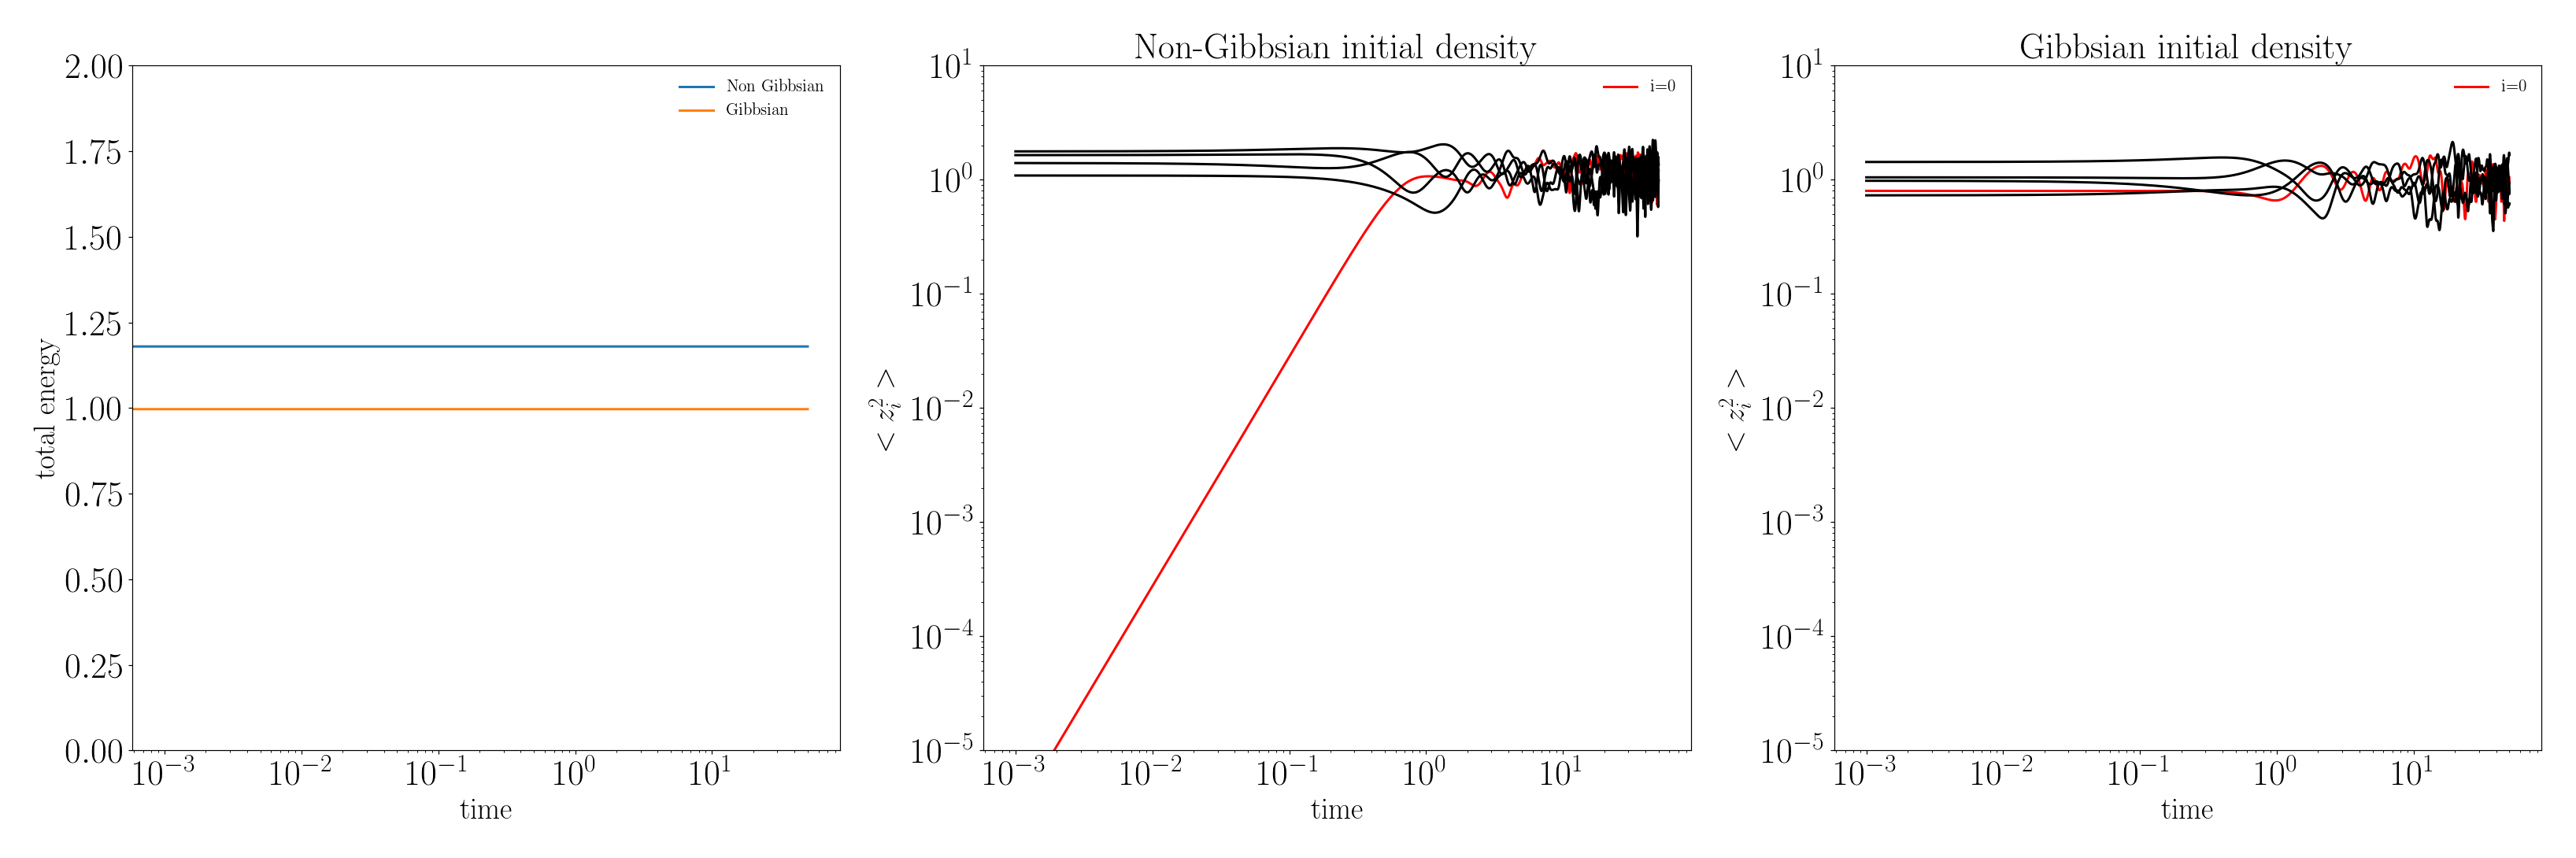

In [6]:
fig,ax=plot_ensemble()
fig.tight_layout()

##  Example 2 : The ''Gletzer-Ohkitani-Yamada'"  Model :

Another "poor man" (but slightly richer) set of equation

We consider the following inviscid dynamics (GOY), for $k=k_{min}$ to $k_{max}$

$$ \dot u_k  = \lambda^k \left(u_{k-1}^\star u_{k-2}^\star-\lambda(1+\gamma) u_{k-1}^\star u_{k+1}^\star+ \lambda^2 \gamma u_{k+1}^\star u_{k+2}^\star\right)$$

The boundary terms $u_{k_{min}-1}$,$u_{k_{min}-2}$, $u_{k_{max}+1}$, $u_{k_{max}+2}$ are zero. 

Initial condition is $$u_k(t=0) \in \mathbb C$$

The conserved quantities are $E=\sum_k  |u_k|^2$ and $Z=\sum_k \gamma^k |u_k|^2$

The  $\lambda^k$ represent ''wavenumbers''. We will typically choose $ \lambda=2^{1/3}$

The 3D case corresponds to $\gamma =-\lambda$, in which case $Z$ is akin to helicity

The 2D case corresponds in principle to $\gamma =\lambda^{2}$, in which case $Z$ is akin to enstrophy.

In [7]:
from DATA_Liouville.Shell4KH import *

flow=GOY(d=3,Lambda=2**(1./3),nu=0,hyper=0,nmin=0,nmax=32,dt=5e-5,s=0.)

flow.init_Gaussian(sig=0.5,kf=3)  
t1,a1,da1=flow.evo(cmax=22)#LOG #10 seconds

flow.time=0
t2,a2,da2=flow.evo(every=1000,cmax=1000)#LOG

4194303 Iterations in 7.79e+00 s 	 t=205.735921 tau_Z 		E = 5.18315682e-01 	 Z= -9.62411132e-01 
1000000 Iterations in 1.87e+00 s 	 t=49.051549 tau_Z 		E = 5.18315656e-01 	 Z= -9.62421794e-01 


In [8]:
def plot_thermalization():
    fig,ax=subplots(1,2,figsize=(2.3*figheight,figheight),num="evoShell")

    n,compt=a1.shape
    Ek=np.abs(a1)**2
    k=flow.Lambdas

    a=ax[0]
    cool=cm.rainbow(np.linspace(0,1,compt))
    for i in range(compt):
        a.plot(np.log(k/k[0])/np.log(k[1]),Ek[:,i]/(Ek[:,0].sum()),'-',color=cool[i,:])
    Ek_av=(np.abs(a2)**2).mean(axis=1)
    a.plot(np.log(k/k[0])/np.log(k[1]),Ek_av/Ek[:,0].sum(),'k--',label='Steady State Average')
    
    a.set_xscale('linear')
    a.set_yscale('log')
    a.set_ylabel('$<|u_k|^2>$')
    a.set_xlabel('$k$')
    a.set_ylim(1e-8,1)
    a.legend()
    a.grid()

    a=ax[1]
    for i in range(compt):
        a.plot(t1[i],Ek[:,i].sum()/Ek[:,0].sum(),'o',color=cool[i,:])
    a.set_xscale('log')
    a.set_yscale('linear')
    a.set_ylim(0,2)
    a.set_xlabel('time')
    a.set_ylabel('Energy')

    return fig,ax

<IPython.core.display.Javascript object>


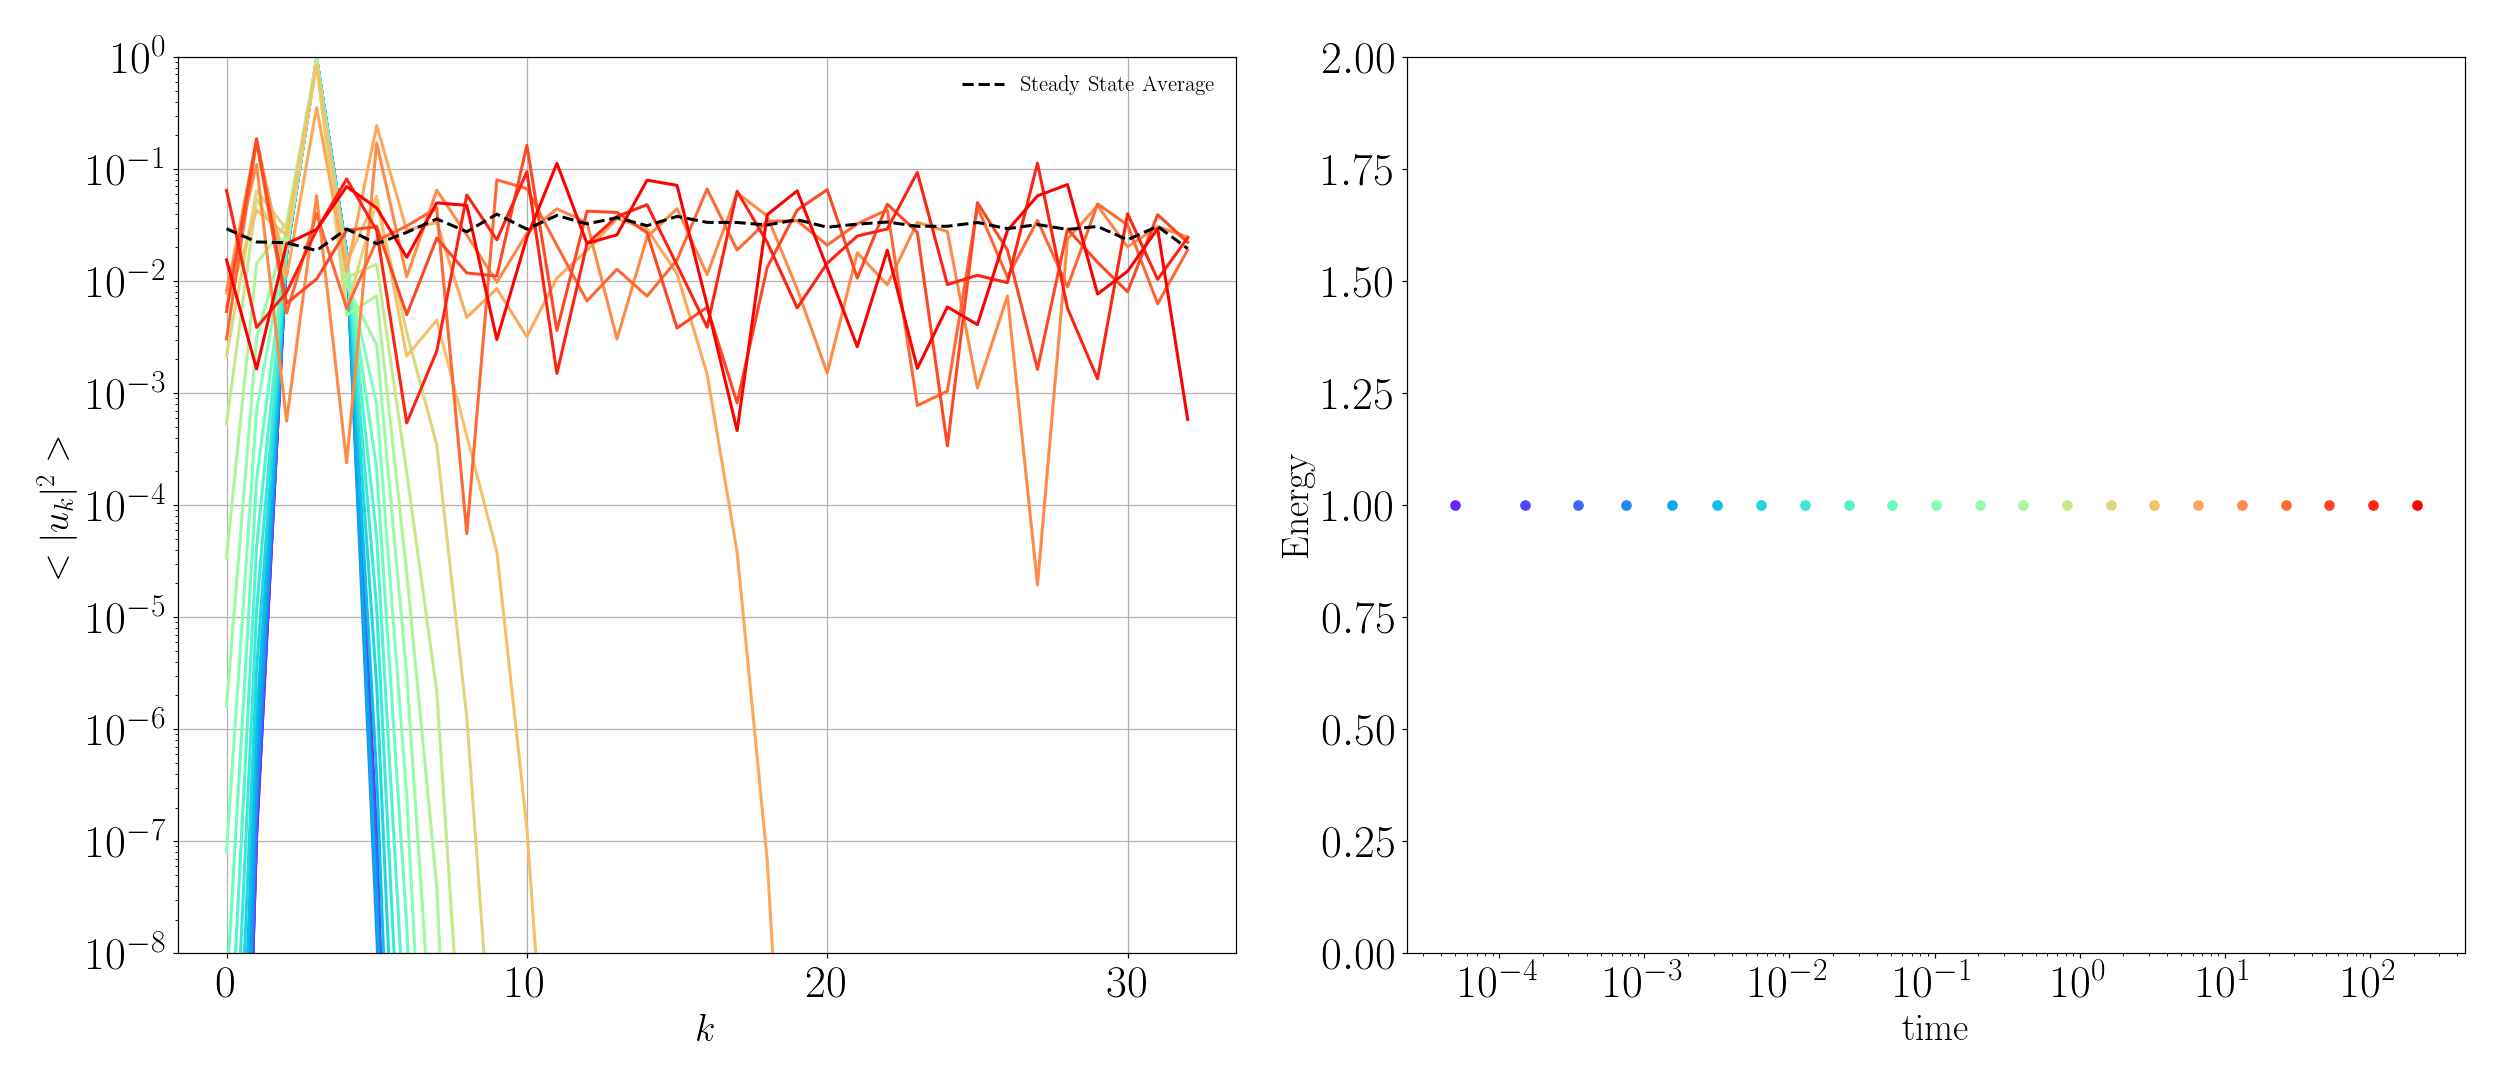

In [9]:
fig,ax=plot_thermalization()

In [10]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')